# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著調整特徵篩選的門檻值, 觀察會有什麼影響效果

# [作業重點]
- 調整相關係數過濾法的篩選門檻, 看看篩選結果的影響 (In[5]~In[8], Out[5]~Out[8])
- 調整L1 嵌入法篩選門檻, 看看篩選結果的影響 (In[9]~In[11], Out[9]~Out[11])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from google.colab import files
uploaded = files.upload()
#data_path = 'data/'
#df = pd.read_csv(data_path + 'titanic_train.csv')
df = pd.read_csv('titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId'] , axis=1)
df.head()

Saving titanic_train.csv to titanic_train.csv


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


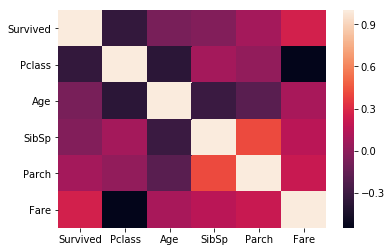

In [2]:
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr)
plt.show()

In [3]:
# 記得刪除 Survived
df = df.drop(['Survived'] , axis=1)

#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]
df = df.fillna(-1)

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



In [4]:
MMEncoder = MinMaxScaler()
df.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [7]:
#The "fit" part applies to the feature extractor itself: it determines what features it will base future transformations on.
#The "transform" part is what takes the data and returns some transformed data back at you
  
train_X = MMEncoder.fit_transform(df) 
train_X[:5]  #轉成array

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 0.28395062, 0.125     , 0.        , 0.01415106],
       [0.        , 0.48148148, 0.125     , 0.        , 0.13913574],
       [1.        , 0.33333333, 0.        , 0.        , 0.01546857],
       [0.        , 0.44444444, 0.125     , 0.        , 0.1036443 ],
       [1.        , 0.44444444, 0.        , 0.        , 0.01571255]])

# 作業1
* 鐵達尼生存率預測中，試著變更兩種以上的相關係數門檻值，觀察預測能力是否提升?

由上述不同門檻可以發現, 相關係數有時候確實能成功提升準確度, 但篩選過頭會有反效果
門檻的決定沒有一定的準則, 因此這個方法並不那麼好用

In [0]:
# 原始特徵 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df)
estimator = LogisticRegression(solver='lbfgs')  #若都用相同Regression, 設一次就好
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.7004864906462793

In [8]:
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
corr.index

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [15]:
corr[(corr['Survived']>0.05)]

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [16]:
corr[(corr['Survived']<-0.05)]

,Survived,Pclass,Age,SibSp,Parch,Fare
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067


In [14]:
# 篩選相關係數大於 0.05 或小於 -0.05 的特徵
high_list = list(corr[(corr['Survived']>0.05) | (corr['Survived']<-0.05)].index)
high_list.pop(0)
print(high_list)

['Pclass', 'Age', 'Parch', 'Fare']


In [17]:
# 特徵1 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()  #取高特徵沒比較好???

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.7038572771631333

In [18]:
# 篩選相關係數2
"""
Your Code Here

"""
high_list = list(corr[(corr['Survived']>0.1) | (corr['Survived']<-0.1)].index)

high_list.pop(0) #'Survived'須刪除
print(high_list)

['Pclass', 'Fare']


In [19]:
# 特徵2 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6791567235397566

# 作業2
* 續上題，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?
在作業與範例中, 效果並不如顯著
而且與相關係數法類似, L1 Embedding 也需要調整 alpha 值, 且沒有一定法則
所以也並非好用的特徵篩選方式

In [20]:
from sklearn.linear_model import Lasso
L1_Reg = Lasso(alpha=0.005)
train_X = MMEncoder.fit_transform(df)
L1_Reg.fit(train_X, train_Y)  #L1_Reg需要fit
L1_Reg.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([-0.39126312, -0.1355752 , -0.        ,  0.03068895,  0.        ])

In [21]:
from itertools import compress
#L1_mask = list((L1_Reg.coef_[(L1_Reg.coef_>0.2) | (L1_Reg.coef_<-0.2 )]))
L1_mask = list((L1_Reg.coef_>0) | (L1_Reg.coef_<0))
L1_list = list(compress(list(df), list(L1_mask)))
L1_list


['Pclass', 'Age', 'Parch']

In [22]:
train_X = MMEncoder.fit_transform(df[L1_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.6993628951406613